In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

measurement
--------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
--------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [6]:
# Declare a Base using `automap_base()`

# Use the Base class to reflect the database tables

# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [7]:
# Print all of the classes mapped to the Base


In [8]:
# Assign the measurement class to a variable called `Measurement` and

measurement = Base.classes.station

# the station class to a variable called `Station`
station = Base.classes.station

print(measurement)
print(station)


<class 'sqlalchemy.ext.automap.station'>
<class 'sqlalchemy.ext.automap.station'>


In [9]:
# Create a session
session = Session(engine)
connection = engine.connect()

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
maxdate = text("""
                SELECT max(date)
                FROM measurement;
                """)
connection.execute(maxdate).fetchall()


[('2017-08-23',)]

In [11]:
stationdata = text("""
                    SELECT *
                    FROM station 
                    LIMIT 10
                    """)
stationdf = pd.read_sql(stationdata, con=connection)
stationdf

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [12]:
measurementdata = text("""
                    SELECT *
                    FROM measurement 
                    LIMIT 10
                    """)
measurementdf = pd.read_sql(measurementdata, con=connection)
measurementdf

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [14]:
oneyear = text("""
                SELECT id, station, date, prcp
                FROM measurement
                WHERE date >= '2017-08-23'
                ORDER BY date;
                """)
oneyeardf = pd.read_sql(oneyear, con=connection)
oneyeardf.head()

,id,station,date,prcp
0,2724,USC00519397,2017-08-23,0.00
1,7635,USC00514830,2017-08-23,0.00
2,12187,USC00519523,2017-08-23,0.08
3,19550,USC00516128,2017-08-23,0.45


<Figure size 1200x800 with 0 Axes>

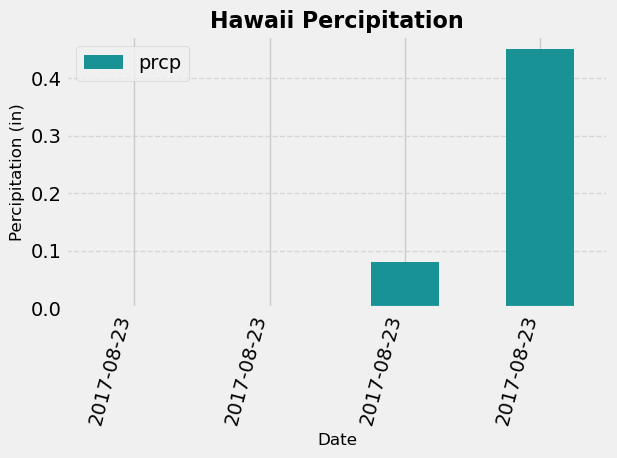

In [15]:
# Plot the data
plt.figure(figsize=(12, 8))  
oneyeardf.plot(kind='bar', x="date", y="prcp", color='#199296')

# Add titles and labels
plt.title("Hawaii Percipitation", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Percipitation (in)", fontsize=12)
plt.xticks(rotation=75, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()  
plt.show()


In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
oneyeardf.prcp.describe()

count    4.0000
mean     0.1325
std      0.2150
min      0.0000
25%      0.0000
50%      0.0400
75%      0.1725
max      0.4500
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
stationnum = text("""
                    SELECT COUNT(station)
                    FROM station;
                    """)
connection.execute(stationnum).fetchall()
                    

[(9,)]

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activestations = text("""
                        SELECT station, COUNT(station) AS number_observations
                        FROM measurement
                        GROUP BY station
                        ORDER BY number_observations desc;
                        """)
activestationsdf = pd.read_sql(activestations, con=connection)
activestationsdf.head(10)

,station,number_observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tempdata = text("""
                SELECT MIN(tobs), MAX(tobs), AVG(tobs)
                FROM measurement
                WHERE station = 'USC00519281';
                """)
tempdatadf = pd.read_sql(tempdata, con=connection)
tempdatadf.head()

,MIN(tobs),MAX(tobs),AVG(tobs)
0,54.0,85.0,71.663781


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempdata2 = text("""
                SELECT id, station, date, tobs
                FROM measurement
                WHERE station = 'USC00519281 and date >= '2017-08-23'
                ORDER BY date;
                """)
tempdatadf2 = pd.read_sql(tempdata2, con=connection)
tempdatadf2.head()

OperationalError: (sqlite3.OperationalError) near "2017": syntax error
[SQL: 
                SELECT id, station, date, tobs
                FROM measurement
                WHERE station = 'USC00519281 and date >= '2017-08-23'
                ORDER BY date;
                ]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

# Close Session

In [ ]:
# Close Session
session.close()
